<a href="https://colab.research.google.com/github/aryan619348/Dog_vs_Cats_CNN/blob/main/Dogs_vs_Cats_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lets First Import the Dogs vs cats data from kaggle: https://www.kaggle.com/c/dogs-vs-cats/overview

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2021-11-25 08:36:23--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.96.128, 108.177.119.128, 108.177.127.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.96.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   189MB/s    in 0.3s    

2021-11-25 08:36:24 (189 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Unzipping the data:

In [2]:
import os
import zipfile
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

Lets now define the directories for both dogs and cats for each data set that training dataset and testing dataset

In [3]:
#For training data
train_dog_dir=os.path.join('/content/cats_and_dogs_filtered/train/dogs')
train_cat_dir=os.path.join('/content/cats_and_dogs_filtered/train/cats')

#For testing data
test_dog_dir=os.path.join('/content/cats_and_dogs_filtered/validation/dogs')
test_cat_dir=os.path.join('/content/cats_and_dogs_filtered/validation/cats')

Lets see the total number of images for each category(dog and cat) and some of the images too

In [6]:
print('Total dog pics in training set= ',len(os.listdir(train_dog_dir)))
print('Total dog pics in training set= ',len(os.listdir(train_cat_dir)))

Total dog pics in training set=  1000
Total dog pics in training set=  1000


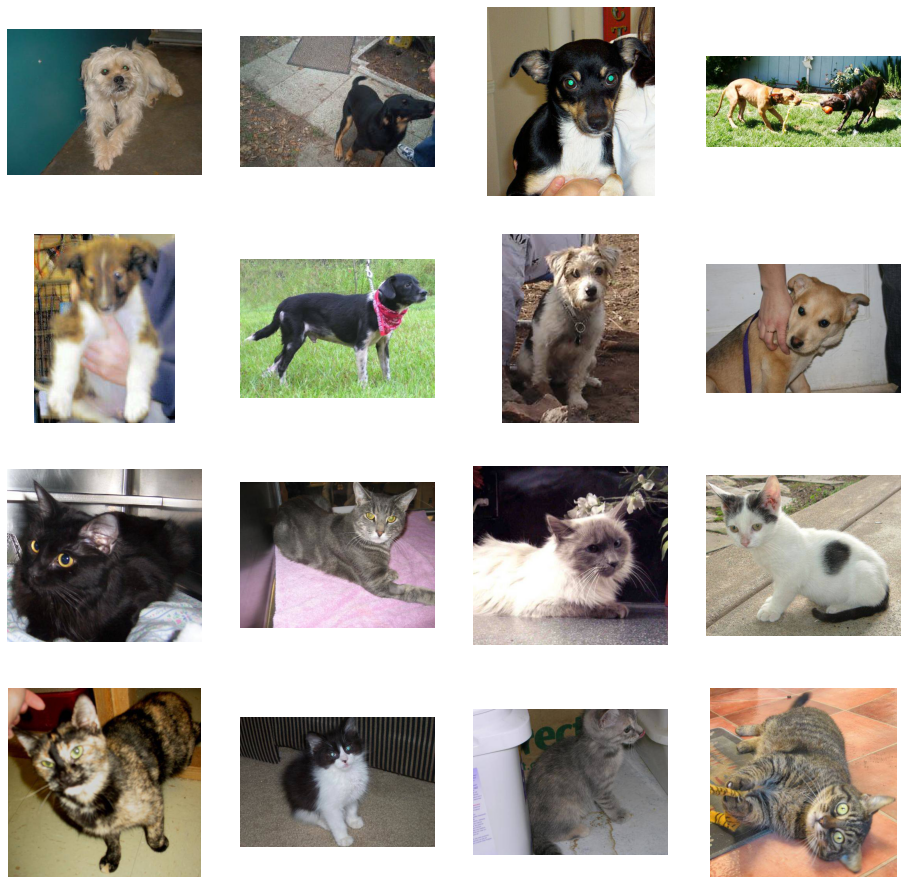

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrow=4
ncol=4
fig=plt.gcf()
fig.set_size_inches(ncol*4,nrow*4)
index=8
next_dog_pic=[os.path.join(train_dog_dir,fname)
                for fname in os.listdir(train_dog_dir)[0:index]]
next_cat_pic=[os.path.join(train_cat_dir,fname)
                for fname in os.listdir(train_cat_dir)[0:index]]

for i,img_path in enumerate(next_dog_pic+next_cat_pic):
  sp=plt.subplot(nrow,ncol,i+1)
  sp.axis('Off')
  img=mpimg.imread(img_path)
  plt.imshow(img)
plt.show()

Now lets create a simple NN model with 5 convolution layers:

In [11]:
import tensorflow as tf

In [35]:
#Lets create the CNN model
model=tf.keras.Sequential([
    #first convolution:
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    #second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #flaten to DNN
    tf.keras.layers.Flatten(),
    #hidden layer with 512 neurons
    tf.keras.layers.Dense(512,activation='relu'),
    #output 1 neuron= 0(horses) or 1(humans)
    tf.keras.layers.Dense(1,activation='sigmoid')
])

Lets print the summary of the NN

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 17, 17, 64)      

Next, we'll configure the specifications for model training. We will train our model with the binary_crossentropy loss, because it's a binary classification problem and our final activation is a sigmoid.

We will use the rmsprop optimizer with a learning rate of 0.001. 


In [37]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

Now lets perform Data Preprocessing and add the labels to the images using ImageDataGenerator

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen=ImageDataGenerator(rescale=1/255)
test_data_gen=ImageDataGenerator(rescale=1/255)

train_generator=train_data_gen.flow_from_directory(
    '/content/cats_and_dogs_filtered/train',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

test_generator=train_data_gen.flow_from_directory(
    '/content/cats_and_dogs_filtered/validation',
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 test images

In [39]:
history=model.fit(train_generator,steps_per_epoch=100,epochs=15,verbose=1,
                  validation_data=test_generator, validation_steps=50)

Epoch 1/15
100/100 [==============================] - 60s 591ms/step - loss: 0.7143 - accuracy: 0.5840 - val_loss: 0.6161 - val_accuracy: 0.6670
Epoch 2/15
100/100 [==============================] - 59s 590ms/step - loss: 0.6102 - accuracy: 0.6785 - val_loss: 0.6083 - val_accuracy: 0.6550
Epoch 3/15
100/100 [==============================] - 59s 589ms/step - loss: 0.5300 - accuracy: 0.7435 - val_loss: 0.5569 - val_accuracy: 0.7110
Epoch 4/15
100/100 [==============================] - 59s 590ms/step - loss: 0.4728 - accuracy: 0.7695 - val_loss: 0.6804 - val_accuracy: 0.6860
Epoch 5/15
100/100 [==============================] - 59s 587ms/step - loss: 0.3729 - accuracy: 0.8320 - val_loss: 0.6046 - val_accuracy: 0.7200
Epoch 6/15
100/100 [==============================] - 59s 589ms/step - loss: 0.3034 - accuracy: 0.8635 - val_loss: 0.7037 - val_accuracy: 0.7170
Epoch 7/15
100/100 [==============================] - 59s 587ms/step - loss: 0.2059 - accuracy: 0.9130 - val_loss: 0.9694 - val_ac

By the end we can see that we get an training accuracy fo 99.1% which is quite impressive!
But the validation/testing accuracy is only 71.7% which is quite good considering we are using only a subset of the entire dataset.

Now lets input some images from online and see how the models perform.

In [40]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")


Saving cat_1.jpeg to cat_1.jpeg
Saving cat_2.jpeg to cat_2.jpeg
Saving cat_3.jpeg to cat_3.jpeg
Saving dog_1.jpeg to dog_1.jpeg
Saving dog_2.jpeg to dog_2.jpeg
Saving dog_3.jpeg to dog_3.jpeg
[0.]
cat_1.jpeg is a cat
[0.]
cat_2.jpeg is a cat
[0.]
cat_3.jpeg is a cat
[1.]
dog_1.jpeg is a dog
[0.]
dog_2.jpeg is a cat
[1.]
dog_3.jpeg is a dog


We can see that our results are quite good, only 1 image= dog_2.jpeg is predicted incorrectly. Lets look at this particular image..

Input Dog Image That Was predicted incorrectly:


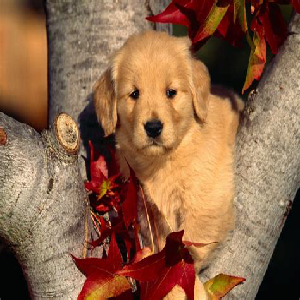

In [45]:
img=image.load_img('/content/dog_2.jpeg',target_size=(300,300))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
print("Input Dog Image That Was predicted incorrectly:")
img

Maybe the sharply defined trees and images fooled the model lets try and edit this image and see if the model performs better

Lets see the effect

In [49]:
uploaded=files.upload()

Saving dog_2_cropped.png to dog_2_cropped (1).png


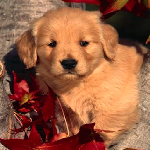

In [50]:
path='/content/dog_2_cropped.png'
img=image.load_img(path, target_size=(150, 150))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img

In [53]:
classes = model.predict(x)
if classes>0:
  print(" this is a dog")
else:
  print(" this is a cat")

 this is a dog


After editing the image, i.e. cropping out the leaves and the tree branches we can see that the model accurately predicts the image as a dog!

---

